In [1]:
import numpy as np
import matplotlib.pyplot as plt

from random import seed
from random import gauss
import random
import scipy.stats
from scipy.stats import moment

plt.style.use('seaborn-poster')
%matplotlib inline

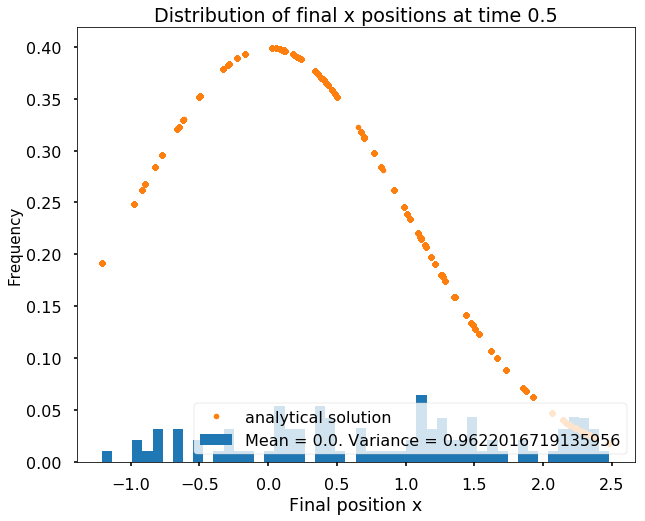

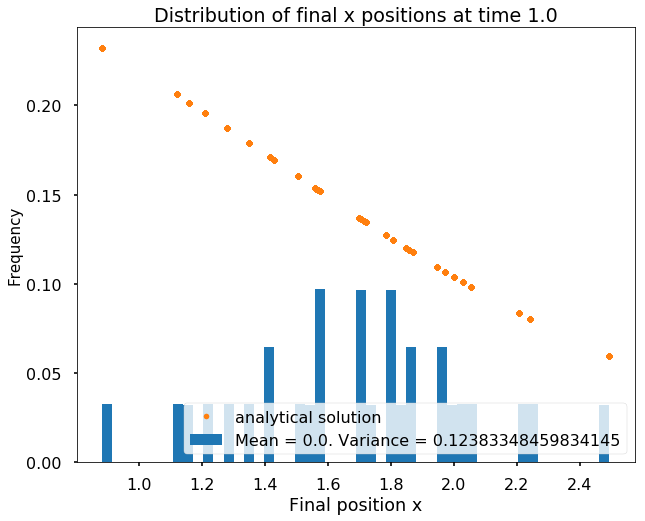

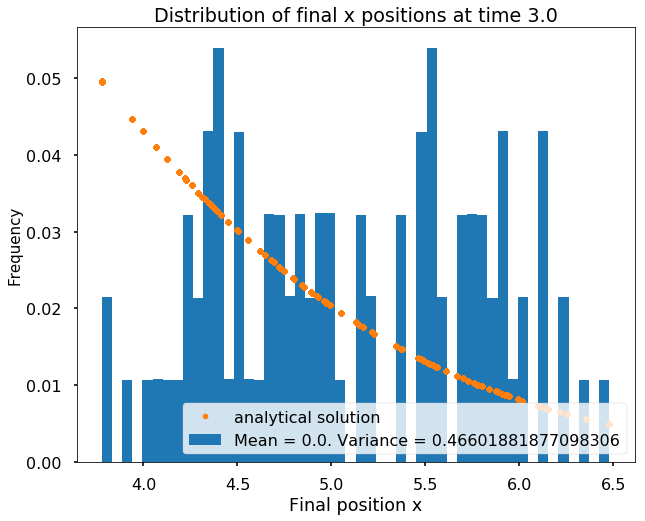

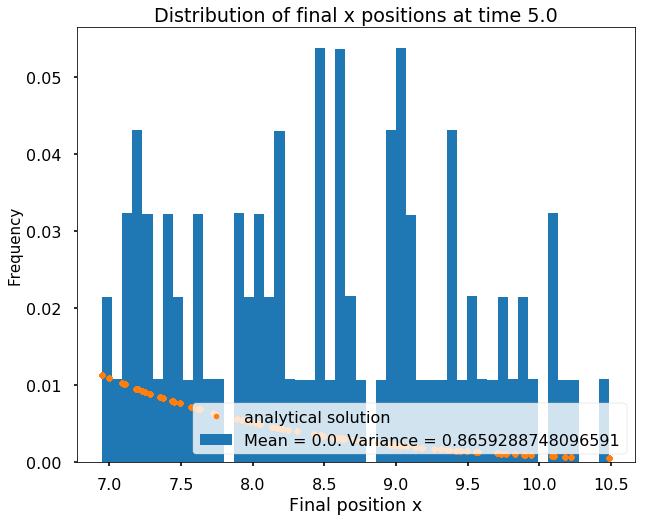

In [ ]:
#initial parameters

dt = 0.01 # Step size
t0 = 0 #initial time
tf = np.array([0.5, 1.0, 3.0, 5.0, 10.0])# final times 
x0 = 0 # Initial Condition
D = 1
sim = 10000 #number of simulations

#analytical solution

def anal(x,t,x0,t0):
    return (1/np.sqrt(4*np.pi*D*t))*np.exp(-((x-x0)**2/(4*D*t)))

MSD=[] # Record MSD for each time point

#loop for each time point
for time in tf:
    t = np.arange(t0, time , dt) #time grid
    x = np.zeros(len(t)) # record positions at each time step
    x[0] = x0
    xfin = [] #record final position
    
    #loop through number of simulations
    for s in range(1,sim):
        #time evolution of position x
        for i in range(0, len(t) - 1):
            #generate random value
            n = random.randint(0,10**4)
            seed(n)
            randomvalue = gauss(0, 1)
            #evoultion of x
            x[i + 1] = x[i] + np.sqrt(2*D*dt)*randomvalue
        #record final value
        xfin.append(x[len(x) - 1])   
            
    
    xfin = np.array(xfin)
    # Calculate mean and variance
    mean = scipy.stats.moment(xfin, moment=1, axis=0, nan_policy='propagate')
    variance = scipy.stats.moment(xfin, moment=2, axis=0, nan_policy='propagate')
    #calculate MSD using x0=0 as reference position
    sum = 0
    for j in range(0, len(xfin)):    
       sum = sum + xfin[j]

    MSD.append((sum/sim)**2)
    
    # Plot histogram and analytical solution
    plt.figure(figsize=[10,8])
    plt.hist(xfin, weights=np.ones(len(xfin))*(1/sim),bins = 50, label='Mean = '+ str(mean)+ '. Variance = '+ str(variance))
    x = np.arange(np.min(xfin),np.max(xfin),100)
    plt.plot(xfin, anal(xfin,time,x0,t0),'.',label='analytical solution')
    plt.xlabel('Final position x')
    plt.ylabel('Frequency',fontsize=15)
    plt.title('Distribution of final x positions at time '+str(time))
    plt.legend(loc='lower right')
    plt.show()


#plot MSD over time
MSD=np.array(MSD)
plt.figure(figsize=[10,8])
plt.plot(tf,MSD,'.',label='exponential growth')
plt.xlabel('time')
plt.ylabel('MSD',fontsize=15)
plt.title('MSD over time')
plt.legend(loc='lower right')
plt.show()


Repeating for the harmonic potential $U=\frac{1}{2}kx^2$

In [ ]:
#initial parameters

dt = 0.01 # Step size
t0 = 0 #initial time
tf = np.array([0.5, 1.0, 3.0, 5.0, 10.0])# final times 
x0 = 0 # Initial Condition
D = 1
sim = 10000 #number of simulations

#analytical solution

def anal(x,t,x0,t0):
    return (1/np.sqrt(4*np.pi*D*t))*np.exp(-((x-x0)**2/(4*D*t)))

MSD=[] # Record MSD for each time point

#loop for each time point
for time in tf:
    t = np.arange(t0, time , dt) #time grid
    x = np.zeros(len(t)) # record positions at each time step
    x[0] = x0
    xfin = [] #record final position
    
    #loop trough number of simulations
    for s in range(1,sim):
        #time evolution of position x
        for i in range(0, len(t) - 1):
            #generate random value
            n = random.randint(0,10**4)
            seed(n)
            randomvalue = gauss(0, 1)
            #evoultion of x
            x[i + 1] = x[i] - D*x[i]*dt + np.sqrt(2*D*dt)*randomvalue
            #record final value
        xfin.append(x[len(x) - 1])   
            
    
    xfin = np.array(xfin)
    # Calculate mean and variance
    mean = scipy.stats.moment(xfin, moment=1, axis=0, nan_policy='propagate')
    variance = scipy.stats.moment(xfin, moment=2, axis=0, nan_policy='propagate')
    #calculate MSD using x0=0 as reference position
    sum = 0
    for j in range(0, len(xfin)):    
       sum = sum + xfin[j]
    
    MSD.append((sum/sim)**2)
    
    # Plot histogram and analytical solution
    plt.figure(figsize=[10,8])
    plt.hist(xfin, weights=np.ones(len(xfin))*(1/sim),bins = 50, label='Mean = '+ str(mean)+ '. Variance = '+ str(variance))
    x = np.arange(np.min(xfin),np.max(xfin),100)
    plt.plot(xfin, anal(xfin,time,x0,t0),'.',label='analytical solution')
    plt.xlabel('Final position x')
    plt.ylabel('Frequency',fontsize=15)
    plt.title('Distribution of final x positions at time '+str(time)+' for harmonic potential')
    plt.legend(loc='lower right')
    plt.show()


#plot MSD over time
MSD=np.array(MSD)
plt.figure(figsize=[10,8])
plt.plot(tf,MSD,'.',label='logarithmic growth')
plt.xlabel('time')
plt.ylabel('MSD',fontsize=15)
plt.title('MSD over time for harmonic potential')
plt.legend(loc='lower right')
plt.show()
